## Reactive Covariance - Project in Python 

### I - Leverage Effect in Financial Markets (Paper 1) 


In [1]:
# Import relevant libraries

import matplotlib.pyplot as plt
import pandas as pd
import os
import fnmatch
import random
import scipy as sp
from scipy.optimize import curve_fit
import numpy as np

In [2]:
## Cette partie permet de lister tous les Stocks et ETFs dans les dossiers pour créer les dictionnaires automatiquement contenant les stocks et ETFs

## Pour les Stocks

directoryStocks = "Data\Stocks"

numberStocks = len(fnmatch.filter(os.listdir(directoryStocks), '*.txt')) # Cela donne le nombre total de stocks dans la folder
full_stock_dictionnary = {} # Creation d'un dictionnaire vide pour les stocks

j = 1
for i in os.listdir(directoryStocks):
    full_stock_dictionnary["Ticker" + str(j)] = i  
    j= j+1

## Pour les Indices

directoryIndex = "Data\ETFs"

numberIndex = len(fnmatch.filter(os.listdir(directoryIndex), '*.txt')) # Cela donne le nombre total de ETFs dans la folder
full_index_dictionnary = {} # Creation d'un dictionnaire vide pour les indices

#index_dictionnary = {i for i in os.listdir(directoryIndex)} ## Remplacer par numberStocks pour looper sur tous les stocks du dossier 

j = 1
for i in os.listdir(directoryIndex):
    full_index_dictionnary["Ticker" + str(j)] = i  
    j= j+1

print(full_stock_dictionnary)
print(full_index_dictionnary)


{'Ticker1': 'a.us.txt', 'Ticker2': 'aa.us.txt', 'Ticker3': 'aaap.us.txt', 'Ticker4': 'aaba.us.txt', 'Ticker5': 'aac.us.txt', 'Ticker6': 'aal.us.txt', 'Ticker7': 'aamc.us.txt', 'Ticker8': 'aame.us.txt', 'Ticker9': 'aan.us.txt', 'Ticker10': 'aaoi.us.txt', 'Ticker11': 'aaon.us.txt', 'Ticker12': 'aap.us.txt', 'Ticker13': 'aapl.us.txt', 'Ticker14': 'aat.us.txt', 'Ticker15': 'aau.us.txt', 'Ticker16': 'aav.us.txt', 'Ticker17': 'aaww.us.txt', 'Ticker18': 'aaxn.us.txt', 'Ticker19': 'ab.us.txt', 'Ticker20': 'abac.us.txt', 'Ticker21': 'abax.us.txt', 'Ticker22': 'abb.us.txt', 'Ticker23': 'abbv.us.txt', 'Ticker24': 'abc.us.txt', 'Ticker25': 'abcb.us.txt', 'Ticker26': 'abcd.us.txt', 'Ticker27': 'abco.us.txt', 'Ticker28': 'abdc.us.txt', 'Ticker29': 'abe.us.txt', 'Ticker30': 'abeo.us.txt', 'Ticker31': 'abeow.us.txt', 'Ticker32': 'abev.us.txt', 'Ticker33': 'abg.us.txt', 'Ticker34': 'abil.us.txt', 'Ticker35': 'abio.us.txt', 'Ticker36': 'ablx.us.txt', 'Ticker37': 'abm.us.txt', 'Ticker38': 'abmd.us.txt', 

In [3]:
# Choisissons un subset aléatoire du dictionnaire de stocks et d'indices pour calculer le leverage

index_dictionnary = {}

for j in range(1,20):
    index_dictionnary["Ticker" + str(j)] = full_index_dictionnary[random.choice(list(full_index_dictionnary.keys()))]
    j= j+1

print(index_dictionnary)

stock_dictionnary = {}

for j in range(1,10):
    stock_dictionnary["Ticker" + str(j)] = full_stock_dictionnary[random.choice(list(full_stock_dictionnary.keys()))]
    j= j+1

print(stock_dictionnary)

{'Ticker1': 'vv.us.txt', 'Ticker2': 'ief.us.txt', 'Ticker3': 'corn.us.txt', 'Ticker4': 'bzq.us.txt', 'Ticker5': 'qinc.us.txt', 'Ticker6': 'ewt.us.txt', 'Ticker7': 'syld.us.txt', 'Ticker8': 'gru.us.txt', 'Ticker9': 'iwn.us.txt', 'Ticker10': 'rsp.us.txt', 'Ticker11': 'emlc.us.txt', 'Ticker12': 'pxlv.us.txt', 'Ticker13': 'scj.us.txt', 'Ticker14': 'vbr.us.txt', 'Ticker15': 'fyc.us.txt', 'Ticker16': 'eurl.us.txt', 'Ticker17': 'mdyg.us.txt', 'Ticker18': 'tflo.us.txt', 'Ticker19': 'fbz.us.txt'}
{'Ticker1': 'wve.us.txt', 'Ticker2': 'ntap.us.txt', 'Ticker3': 'stz-b.us.txt', 'Ticker4': 'wwd.us.txt', 'Ticker5': 'slgn.us.txt', 'Ticker6': 'cld.us.txt', 'Ticker7': 'spa.us.txt', 'Ticker8': 'adhd.us.txt', 'Ticker9': 'wbk.us.txt'}


In [4]:
## Le but de cette classe est de regrouper les méthodes permettant le calcul du leverage
## L'idée est ensuite de pouvoir calculer rapidement le leverage en loopant sur des centaines de stocks et indices 

class ComputeLeverage: 
    
    def __init__(self): ## Méthode du constructeur
        self.ticker = Ticker ## on construit l'objet prenant comme parametre le ticker du stock
        self.security = Security ## Permet de préciser s'il s'agit d'un indice ou d'un stock pour choisir le bon répertoire
        self.df = pd.read_csv(os.path.join("Data\\", self.security, self.ticker),delimiter=',',usecols=['Date','Open','High','Low','Close']) # This is an S&P 500 ETF
        # On importe les données dans la construction de l'objet. La dataframe "df" sera utilisee par les autres méthodes de la classe
        
    def sortData(self):
        self.df = self.df.sort_values("Date") # sort the data by date
        return self.df.head()
    
    def deltaTau(self,tau): # Cette fonction calcule la variation du prix entre t et t + tau (delta x(t+tau)) 
        return (self.df["Close"].shift(-tau) - self.df["Close"].shift(-tau+1))/self.df["Close"].shift(-tau+1)
    
    def zHat(self,tau,T): # Cette fonction calcule Z chapeau
        self.df["Interm_Z"] = (self.deltaTau(tau)**2)  # Calcule l'intérieur de la somme 
        return ((1/T)*(self.df["Interm_Z"].sum())**2) # Retourne la somme des carrés normalisé par T
        
    def lHat(self,tau,T): # C
        self.df["Interm_Prod_Delta"]  = (self.deltaTau(tau))**2*self.deltaTau(0)
        return ((1/(self.zHat(tau,T)*(T-tau)))*self.df["Interm_Prod_Delta"].sum())
    
    def PlotLeverage(self):
        T = self.df.shape[0] # size of our sample
        result_df = pd.DataFrame([])
        for tau in range(0,250): ## specify the max range for the time horizon 
             result_df = result_df.append(pd.DataFrame({"Tau":tau,'L_Hat': self.lHat(tau,T)}, index=[0]), ignore_index=True)
                
        return result_df.plot.scatter(x = "Tau", y = "L_Hat" )
    
    ## C'est exactement la même méthode qu'au dessus. La seule différence est qu'elle retourne le résultat sous forme de tableau et non de graph
    def ReturnLeverage(self):
        T = self.df.shape[0] # size of our sample
        result_df = pd.DataFrame([])
        for tau in range(0,250): ## specify the max range for the time horizon 
            result_df = result_df.append(pd.DataFrame({"Tau":tau,self.ticker: self.lHat(tau,T)}, index=[0]), ignore_index=True)
        return result_df

In [5]:
Tau = 200  ## On spécifie ici l'horizon de temps qui sera calculé au sein de la classe 
Security = "ETFs" ## Select "ETFs" ou "Stocks" pour calculer le leverage des indices / stocks. 
                  ## Cela change le répertoire d'importation des donnees dans la création de la classe

leverage_df = pd.DataFrame({"Tau":range(0,Tau)}) # Création de la première colonne comportant les valeurs de Tau

if (Security == "ETFs"):
    my_dictionnary = index_dictionnary
else:
    my_dictionnary = stock_dictionnary


for key in my_dictionnary:
    Ticker = my_dictionnary.get(key) ## définition du ticker pour la création de l'objet
    myStock = ComputeLeverage() ## Creation de l'objet 
    #myStock.PlotLeverage() ## On appelle la methode qui trace le graph - décommenter pour montrer les graphs
    leverage_df = pd.concat([leverage_df,myStock.ReturnLeverage()[Ticker]], axis=1) # Concaténation du leverage pour chaque stock dans la dataframe Leverage_df

print(leverage_df)

      Tau  vv.us.txt  ief.us.txt  corn.us.txt  bzq.us.txt  qinc.us.txt  \
0     0.0   0.000139    0.010340     0.021132    0.002363    -0.006216   
1     1.0  -0.009912   -0.000712     0.001305    0.001776    -0.028297   
2     2.0  -0.006900    0.008107    -0.000449    0.001677    -0.035253   
3     3.0  -0.008316    0.002746     0.001671    0.000314     0.005041   
4     4.0  -0.011586    0.008517    -0.001675    0.000597     0.001852   
5     5.0  -0.005946    0.007138    -0.004913   -0.000227    -0.005684   
6     6.0  -0.006326   -0.003089    -0.005114    0.000440     0.019150   
7     7.0  -0.003805    0.004802     0.001524   -0.000188    -0.012335   
8     8.0  -0.007790   -0.001216     0.001621    0.000421    -0.009591   
9     9.0  -0.006049    0.006331     0.000227   -0.000109    -0.018949   
10   10.0  -0.010371    0.005047     0.006549    0.000131    -0.003677   
11   11.0   0.003487    0.002198    -0.003093    0.000416     0.012208   
12   12.0  -0.005474    0.010771    -0

     Tau  Mean Leverage
0      0       0.027418
1      1      -0.246132
2      2      -0.005289
3      3      -0.003725
4      4      -0.008194
5      5      -0.002048
6      6      -0.002838
7      7      -0.001144
8      8      -0.004201
9      9      -0.003819
10    10      -0.005438
11    11      -0.006227
12    12      -0.009865
13    13      -0.007011
14    14      -0.007139
15    15      -0.001118
16    16       0.003448
17    17       0.001344
18    18      -0.000542
19    19       0.007040
20    20      -0.005378
21    21      -0.006426
22    22       0.004521
23    23       0.002550
24    24       0.002471
25    25      -0.000023
26    26      -0.021863
27    27      -0.002024
28    28       0.010287
29    29      -0.015041
..   ...            ...
170  170       0.007359
171  171       0.025084
172  172       0.006428
173  173      -0.021932
174  174       0.024130
175  175       0.015832
176  176       0.034477
177  177       0.006538
178  178      -0.030563
179  179      -0

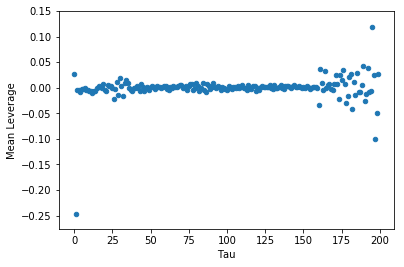

In [6]:
# On cree une colonne qui prend la moyenne du leverage pour tous les stocks pour chaque maturité Tau
mean_leverage_df = pd.DataFrame({"Tau":range(0,Tau)}) # Création de la première colonne comportant les valeurs de Tau
mean_leverage_df["Mean Leverage"] = leverage_df.drop(["Tau"],axis=1).mean(axis=1) # Ne pas oublier de moyenner en enlevant la colonne Tau!

print(mean_leverage_df)
mean_leverage_df.plot.scatter(x = "Tau", y = "Mean Leverage" ) # Plot pour voir le résultat 

#x= mean_leverage_df["Tau"]
#y= mean_leverage_df["Mean Leverage"]
#sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y)
#plt.plot(sp.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y))



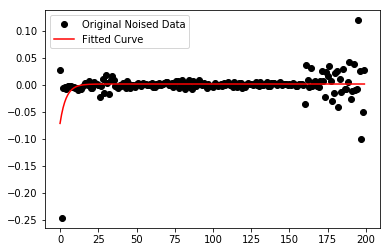

In [7]:
def func(x, a, b, c):
  # return (a*b)
  return a * np.exp(-b*x) +c

x= mean_leverage_df["Tau"]
y= mean_leverage_df["Mean Leverage"]

popt, pcov = curve_fit(func, x, y,p0=(0, 1e-4, 0))

plt.figure()
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()